In [3]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
graphs = np.load('graphs.npy')
graphLocOrg, graphLoc = graphs

## Random Network
Hypothesis: The graphs can be modelled as random networks

Expected characteristics:

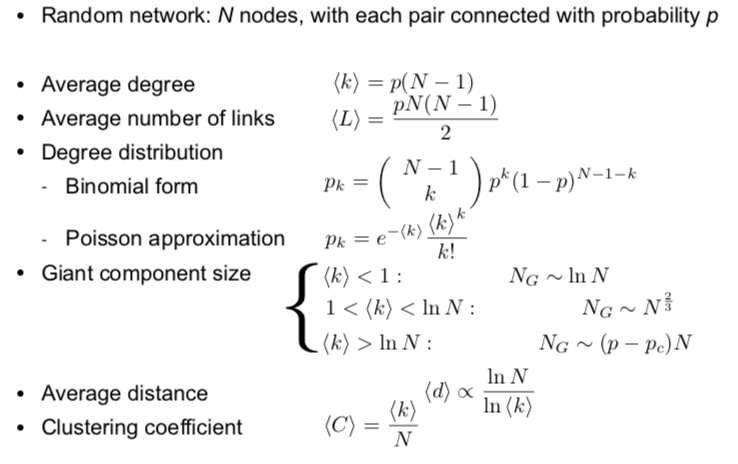

In [5]:
degreePerNodeLocOrg = [d for n, d in graphLocOrg.degree()]
degreePerNodeLoc    = [d for n, d in graphLoc.degree()]

In [6]:
averageDegreeLocOrg = np.mean(degreePerNodeLocOrg)
averageDegreeLoc    = np.mean(degreePerNodeLoc)

In [17]:
pEstLocOrg1 = averageDegreeLocOrg/(graphLocOrg.number_of_nodes()-1)
pEstLoc1    = averageDegreeLoc   /(graphLoc.number_of_nodes()-1)

In [61]:
def poissonDistribution(avgK, k):
    facs = [np.math.factorial(ki) for ki in k]
    return np.divide(np.exp(-avgK)*np.power(avgK,k),facs)

In [62]:
ksLO = range(np.max(degreePerNodeLocOrg))
ksL  = range(1,np.max(degreePerNodeLoc))

In [138]:
randomDistributionLO = poissonDistribution(averageDegreeLocOrg,ksLO)
randomDistributionL  = poissonDistribution(averageDegreeLoc, ksL)

# log-scaled bins
binsLO = np.logspace(0, np.log10(max(degreePerNodeLocOrg)), 
                     len(ksLO))
binsL = np.logspace(0, np.log10(max(degreePerNodeLoc)), 
                     len(ksL))

# Calculate histogram
expDistribtionLO = np.histogram(degreePerNodeLocOrg, bins=binsLO,density=True)
expDistribtionL  = np.histogram(degreePerNodeLoc   , bins=binsL ,density=True)

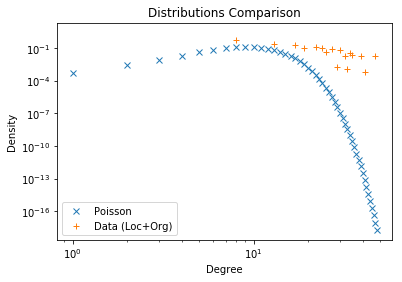

In [139]:
plt.loglog(ksLO,randomDistributionLO,'x')
plt.loglog(ksLO[0:-1], expDistribtionLO[0],'+')
plt.xlabel('Degree')
plt.ylabel('Density')
plt.title('Distributions Comparison')
plt.legend(['Poisson','Data (Loc+Org)'])
pass

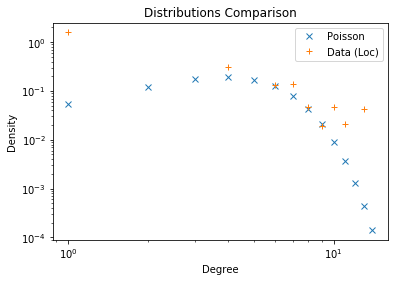

In [142]:
plt.loglog(ksL,randomDistributionL,'x')
plt.loglog(ksL[0:-1],expDistribtionL[0],'+')
plt.xlabel('Degree')
plt.ylabel('Density')
plt.title('Distributions Comparison')
plt.legend(['Poisson','Data (Loc)'])
pass

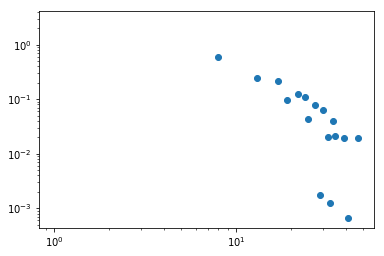

In [149]:
plt.loglog(expDistribtionLO[0],'o')
pass

## Conclusion
Not a random network